# **Computer Vision- Nesne Tanıma İşlemleri**

In [1]:
import cv2

# Görüntüyü yükle
image = cv2.imread('path/to/your/image.jpg')

# Görüntünün yüklenip yüklenmediğini kontrol et
if image is None:
    print("Görüntü yüklenemedi. Dosya yolunu kontrol edin.")
else:
    # Görüntünün boyutunu kontrol et
    print("Görüntü boyutu:", image.shape)


Görüntü yüklenemedi. Dosya yolunu kontrol edin.


1/1 [==============================] - 1s 1s/step
Etiket: abacus, Güven: 0.08
Etiket: space_bar, Güven: 0.08
Etiket: quill, Güven: 0.06
Etiket: desk, Güven: 0.05
Etiket: mortarboard, Güven: 0.04


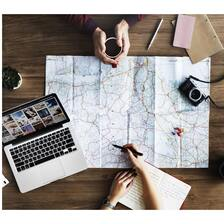

In [4]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Önceden eğitilmiş modeli yükle
model = MobileNetV2(weights='imagenet')

# Görüntüyü yükle
image_path = 'sample_data/image.jpg'
image = cv2.imread(image_path)

# Görüntüyü modele uygun hale getir
resized_image = cv2.resize(image, (224, 224))
expanded_image = np.expand_dims(resized_image, axis=0)
preprocessed_image = preprocess_input(expanded_image)

# Tahminleri yap
predictions = model.predict(preprocessed_image)
decoded_predictions = decode_predictions(predictions, top=5)

# Tahmin sonuçlarını yazdır ve görselleştir
for _, label, confidence in decoded_predictions[0]:
    print(f'Etiket: {label}, Güven: {confidence:.2f}')

# Görüntüyü göster
cv2_imshow(image)


1/1 [==============================] - 1s 1s/step
Etiket: abacus, Güven: 0.08
Etiket: space_bar, Güven: 0.08
Etiket: quill, Güven: 0.06
Etiket: desk, Güven: 0.05
Etiket: mortarboard, Güven: 0.04


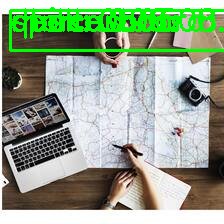

In [5]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Önceden eğitilmiş modeli yükle
model = MobileNetV2(weights='imagenet')

# Görüntüyü yükle
image_path = 'sample_data/image.jpg'
image = cv2.imread(image_path)

# Görüntüyü modele uygun hale getir
resized_image = cv2.resize(image, (224, 224))
expanded_image = np.expand_dims(resized_image, axis=0)
preprocessed_image = preprocess_input(expanded_image)

# Tahminleri yap
predictions = model.predict(preprocessed_image)
decoded_predictions = decode_predictions(predictions, top=5)

# Tahmin sonuçlarını yazdır ve görselleştir
for _, label, confidence in decoded_predictions[0]:
    print(f'Etiket: {label}, Güven: {confidence:.2f}')

# Nesne tanıma sonuçlarını görsel üzerinde işaretle
for _, label, confidence in decoded_predictions[0]:
    cv2.putText(image, f'{label}: {confidence:.2f}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(image, (10, 10), (230, 50), (0, 255, 0), 2)

# Görüntüyü göster
cv2_imshow(image)


1/1 [==============================] - 1s 856ms/step


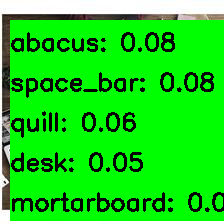

In [6]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Önceden eğitilmiş modeli yükle
model = MobileNetV2(weights='imagenet')

# Görüntüyü yükle
image_path = 'sample_data/image.jpg'
image = cv2.imread(image_path)

# Görüntüyü modele uygun hale getir
resized_image = cv2.resize(image, (224, 224))
expanded_image = np.expand_dims(resized_image, axis=0)
preprocessed_image = preprocess_input(expanded_image)

# Tahminleri yap
predictions = model.predict(preprocessed_image)
decoded_predictions = decode_predictions(predictions, top=5)

# Nesne tanıma sonuçlarını görsel üzerinde işaretle
y = 50  # İlk etiketin y koordinatı
for _, label, confidence in decoded_predictions[0]:
    text = f'{label}: {confidence:.2f}'
    cv2.rectangle(image, (10, y - 30), (300, y + 10), (0, 255, 0), cv2.FILLED)  # Etiketin arka planını yeşil ile doldur
    cv2.putText(image, text, (10, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 0), 2)  # Etiketi yazdır
    y += 40  # Bir sonraki etiketin y koordinatını güncelle

# Görüntüyü göster
cv2_imshow(image)


# **Veri Tabanı İşlemleri**

In [7]:
import sqlite3

# Veritabanına bağlan
conn = sqlite3.connect('mydatabase.db')
cursor = conn.cursor()

# Tablo oluştur
cursor.execute('''
    CREATE TABLE IF NOT EXISTS users (
        id INTEGER PRIMARY KEY,
        name TEXT,
        email TEXT
    )
''')

# Yeni kullanıcı ekle
def add_user(name, email):
    cursor.execute("INSERT INTO users (name, email) VALUES (?, ?)", (name, email))
    conn.commit()

# Tüm kullanıcıları getir
def get_all_users():
    cursor.execute("SELECT * FROM users")
    rows = cursor.fetchall()
    for row in rows:
        print(f'ID: {row[0]}, Name: {row[1]}, Email: {row[2]}')

# Kullanıcıları temizle
def clear_users():
    cursor.execute("DELETE FROM users")
    conn.commit()

# Kullanıcı ekle
add_user('John Doe', 'john@example.com')

# Tüm kullanıcıları getir
get_all_users()

# Kullanıcıları temizle
clear_users()

# Veritabanı bağlantısını kapat
conn.close()


ID: 1, Name: John Doe, Email: john@example.com


# **Web Scraping**

In [8]:
import requests
from bs4 import BeautifulSoup

# Web sitesinden veriyi çekme
def scrape_website(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Veriyi analiz etme ve işleme
    # Örnek olarak tüm başlıkları alalım
    headings = soup.find_all('h1')
    for heading in headings:
        print(heading.text)

# Web sitesinden veriyi çek
scrape_website('https://www.example.com')


Example Domain


# **Dosya İşlemleri**

In [16]:
def read_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
        return content

def write_file(file_path, content):
    with open(file_path, 'w') as file:
        file.write(content)

file_content = read_file('sample_data/example.txt')
print(file_content)

write_file('new_file.txt', 'Bu dosyaya yazıldı.')




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# **Veri Görselleştirme**

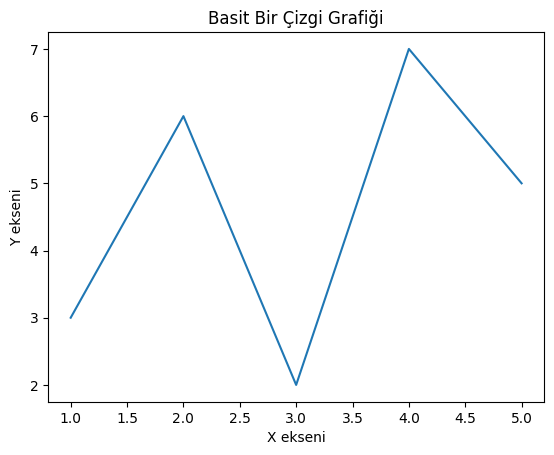

In [18]:
import matplotlib.pyplot as plt

# Veri kümesi
x = [1, 2, 3, 4, 5]
y = [3, 6, 2, 7, 5]

# Çizgi grafiğini oluşturma
plt.plot(x, y)

# Eksen etiketleri ve başlık
plt.xlabel('X ekseni')
plt.ylabel('Y ekseni')
plt.title('Basit Bir Çizgi Grafiği')

# Grafiği göster
plt.show()


# **Zaman İşlemleri ( Date/Time)**

In [19]:
import datetime

# Geçerli tarih ve saat
current_date = datetime.datetime.now()
print(f'Geçerli Tarih ve Saat: {current_date}')

# Belirli bir tarih oluşturma
custom_date = datetime.datetime(2023, 6, 1, 12, 30, 0)
print(f'Özel Tarih: {custom_date}')

# İki tarih arasındaki farkı hesaplama
date1 = datetime.datetime(2023, 6, 1)
date2 = datetime.datetime(2023, 6, 10)
date_diff = date2 - date1
print(f'Tarih Farkı: {date_diff}')

# Belirli bir süreyi tarihe eklemek
duration = datetime.timedelta(days=7, hours=3)
new_date = current_date + duration
print(f'Yeni Tarih: {new_date}')


Geçerli Tarih ve Saat: 2023-06-09 09:47:09.406997
Özel Tarih: 2023-06-01 12:30:00
Tarih Farkı: 9 days, 0:00:00
Yeni Tarih: 2023-06-16 12:47:09.406997


# **Dosya İşlemleri ve Veri Analizi**

In [24]:
import pandas as pd

# Random veri setini oluştur
data = {
    'İsim': ['Ahmet', 'Mehmet', 'Ayşe', 'Fatma', 'Ali'],
    'Yaş': [25, 32, 28, 30, 27],
    'Şehir': ['İstanbul', 'Ankara', 'İzmir', 'Bursa', 'Antalya']
}

# Veri setini DataFrame'e dönüştür
df = pd.DataFrame(data)

# DataFrame'i CSV dosyasına yaz
df.to_csv('random_veri.csv', index=False)

# CSV dosyasını oku ve verileri analiz et
df_read = pd.read_csv('random_veri.csv')

# Verileri görüntüle
print(df_read.head())


     İsim  Yaş     Şehir
0   Ahmet   25  İstanbul
1  Mehmet   32    Ankara
2    Ayşe   28     İzmir
3   Fatma   30     Bursa
4     Ali   27   Antalya


Bir örnek daha

In [26]:
import pandas as pd
import numpy as np

# Random veri setini oluştur
np.random.seed(42)
names = ['Ahmet', 'Mehmet', 'Ayşe', 'Fatma', 'Ali']
ages = np.random.randint(18, 40, size=len(names))
cities = ['İstanbul', 'Ankara', 'İzmir', 'Bursa', 'Antalya']
data = {'İsim': names, 'Yaş': ages, 'Şehir': cities}

# Veri setini DataFrame'e dönüştür
df = pd.DataFrame(data)

# DataFrame'i CSV dosyasına yaz
df.to_csv('random_veri.csv', index=False)

# CSV dosyasını oku ve verileri analiz et
df_read = pd.read_csv('random_veri.csv')

# Verileri görüntüle
print(df_read.head())


     İsim  Yaş     Şehir
0   Ahmet   24  İstanbul
1  Mehmet   37    Ankara
2    Ayşe   32     İzmir
3   Fatma   28     Bursa
4     Ali   25   Antalya


# Yapay Zeka ve Makine Öğrenmesi:

Scikit-learn gibi kütüphaneler, çeşitli makine öğrenmesi algoritmalarını uygulamanızı sağlar. Basit bir regresyon modeli aşağıdaki gibi oluşturulabilir:

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Random veri setini oluştur
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X + 3 + np.random.randn(100, 1)

# Lineer regresyon modelini oluştur ve eğit
model = LinearRegression()
model.fit(X, y)

# Modelin katsayılarını ve kesme terimini yazdır
print("Katsayılar:", model.coef_)
print("Kesme terimi:", model.intercept_)


Katsayılar: [[1.95402268]]
Kesme terimi: [3.21509616]


# başka bir tahmin örneği:

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Random veri setini oluştur
np.random.seed(42)
reklam_harcamalari = np.random.randint(1000, 10000, size=100)
satışlar = 3 * reklam_harcamalari + np.random.randn(100) * 100

# Veri setini DataFrame'e dönüştür
data = pd.DataFrame({'Reklam_Harcamalari': reklam_harcamalari, 'Satışlar': satışlar})

# Veri setini CSV dosyasına yaz
data.to_csv('veri_seti.csv', index=False)

# Veri setini yükle
data = pd.read_csv('veri_seti.csv')

# Bağımsız değişkenleri (reklam harcamaları) ve bağımlı değişkeni (satışlar) ayrıştır
X = data[['Reklam_Harcamalari']]
y = data['Satışlar']

# Lineer regresyon modelini oluştur ve eğit
model = LinearRegression()
model.fit(X, y)

# Gelecekteki reklam harcamalarına göre satış tahmini yap
yeni_reklam_harcamasi = [[5000]]  # Örnek olarak 5000 birim reklam harcaması
tahmin = model.predict(yeni_reklam_harcamasi)
print("Tahmin edilen satış miktarı:", tahmin)


Tahmin edilen satış miktarı: [15004.37278645]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Eğlenceli bir örnek yapalım. Örneğin, bir arkadaş grubu bir piknik için gidecekleri yerin hava durumuyla ilgili bir tahmin yapmak istiyor. Bunun için geçmiş verilere dayalı olarak sıcaklık ve nem değerleri arasındaki ilişkiyi kullanarak bir lineer regresyon modeli oluşturabiliriz.


Veri Seti:

Sıcaklık (bağımsız değişken): Derece cinsinden sıcaklık değerleri
Nem (bağımlı değişken): Yüzde cinsinden nem değerleri
Adımlar:

Veri toplama: Geçmiş piknik günlerine ait sıcaklık ve nem verilerini içeren bir veri seti elde edilir.
Veri analizi: Veri seti gözlemlenir, eksik veya anormal değerler kontrol edilir.
Veri hazırlığı: Veri seti, bağımsız değişken (sıcaklık) ve bağımlı değişken (nem) olarak ayrılır.
Model oluşturma: Lineer regresyon modeli oluşturulur ve veri seti üzerinde eğitilir.
Model değerlendirmesi: Modelin performansı değerlendirilir, gerçek ve tahmin edilen nem değerleri karşılaştırılır.
Tahmin yapma: Model kullanılarak gelecekteki sıcaklık değerine göre nem tahmini yapılır.

In [29]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Random veri setini oluştur
np.random.seed(42)
sicaklik = np.random.randint(20, 40, size=100)
nem = sicaklik + np.random.randn(100) * 5

# Veri setini DataFrame'e dönüştür
data = pd.DataFrame({'Sıcaklık': sicaklik, 'Nem': nem})

# Veri setini CSV dosyasına yaz
data.to_csv('piknik_verileri.csv', index=False)

# Veri setini yükle
data = pd.read_csv('piknik_verileri.csv')

# Bağımsız değişkenleri (sıcaklık) ve bağımlı değişkeni (nem) ayrıştır
X = data[['Sıcaklık']]
y = data['Nem']

# Lineer regresyon modelini oluştur ve eğit
model = LinearRegression()
model.fit(X, y)

# Gelecekteki sıcaklık değerine göre nem tahmini yap
yeni_sicaklik = [[30]]  # Örnek olarak 30 derece sıcaklık
tahmin = model.predict(yeni_sicaklik)
print("Tahmin edilen nem değeri:", tahmin)


Tahmin edilen nem değeri: [30.1124322]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


başka bir örnek yapalım..

In [32]:
import pandas as pd

# Veri setini yükle
data = pd.read_csv('sample_data/student-mat.csv', sep=';')

# Veri setini incele
print(data.head())

# Eksik değerleri kontrol et
print(data.isnull().sum())

# Veri setini temizleme ve düzenleme işlemlerini yap
# Örneğin, eksik değerleri doldurma, veri dönüşümleri, outlier'ların ele alınması gibi işlemler yapılabilir

# Temizlenmiş veri setini kullanarak analiz veya tahmin yapmaya devam edebilirsiniz


  school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0  GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mot...                                                                                                                                                                                 
1  GP,F,17,U,GT3,T,1,1,at_home,other,course,fathe...                                                                                                                                                                                 
2  GP,F,15,U,LE3,T,1,1,at_home,other,other,mother...                                                                                                                                                                                 
3  GP,F,15,U,GT3,T,4,2,health,services,home,mothe...                            

In [33]:
import cv2

# Yüz ifadelerini tanımak için CascadeClassifier yükleyin
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Kamera üzerinden görüntüyü yakalayın
cap = cv2.VideoCapture(0)

while True:
    # Görüntüyü okuyun
    ret, frame = cap.read()

    # Gri tonlamalı görüntü oluşturun
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Yüzleri tespit etmek için CascadeClassifier kullanın
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # Her yüz için işlemleri gerçekleştirin
    for (x, y, w, h) in faces:
        # Yüzü kırpın
        face_roi = gray[y:y + h, x:x + w]

        # Algılama sonuçlarını ekrana yazdırın
        cv2.putText(frame, 'Mutlu', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Görüntüyü gösterin
    cv2.imshow('Yüz İfade Algılama', frame)

    # 'q' tuşuna basıldığında döngüyü sonlandırın
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Kaynakları serbest bırakın ve pencereleri kapatın
cap.release()
cv2.destroyAllWindows()


error: ignored